In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
babies = pd.read_csv('babies.txt', sep=" ", engine='python')
babies.head()

,birth.weight,gestation,not.first.born,mom.age,mom.height,mom.weight,mom.smokes
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,108,282,0,23,67,125,1
4,136,286,0,25,62,93,0


In [3]:
babies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
birth.weight,1174.0,119.462521,18.328671,55.0,108.00,120.0,131.0,176.0
gestation,1174.0,279.101363,16.010305,148.0,272.00,280.0,288.0,353.0
not.first.born,1174.0,0.262351,0.440100,0.0,0.00,0.0,1.0,1.0
mom.age,1174.0,27.228279,5.817839,15.0,23.00,26.0,31.0,45.0
mom.height,1174.0,64.049404,2.526102,53.0,62.00,64.0,66.0,72.0
mom.weight,1174.0,128.478705,20.734282,87.0,114.25,125.0,139.0,250.0
mom.smokes,1174.0,0.390971,0.488176,0.0,0.00,0.0,1.0,1.0


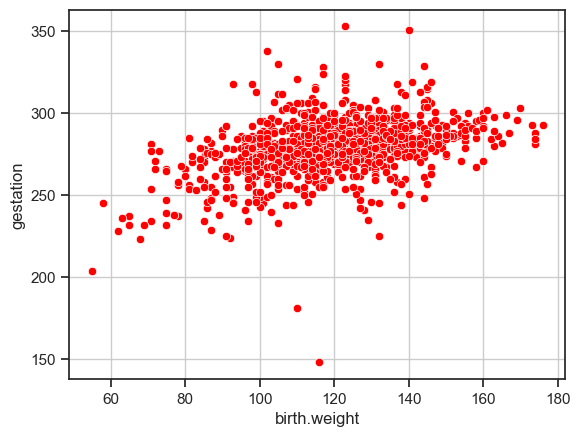

0.40754279338885097


In [4]:
# Plot Against gestation
seaborn.set(style="ticks")
seaborn.scatterplot(x=babies['birth.weight'], y=babies['gestation'], color='red')
plt.grid()
plt.show()
print(babies['birth.weight'].corr(babies['gestation']))

The graph demonstrates that gestation has a positive linear relationship with birth weight.

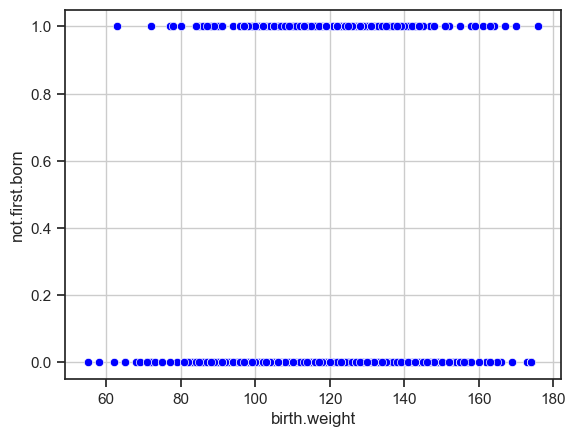

-0.043908173484307284


In [5]:
# Plot Against not firstborn
seaborn.set(style="ticks")
seaborn.scatterplot(x=babies['birth.weight'], y=babies['not.first.born'], color='blue')
plt.grid()
plt.show()
print(babies['birth.weight'].corr(babies['not.first.born']))

There is no linear relationship between "birth.weight" and "not.first.born" in the graph.
The correlation value between the two columns is quite low, showing that the "not.first.born" attribute has no meaningful influence on the child's weight. As a result, this column can be removed.

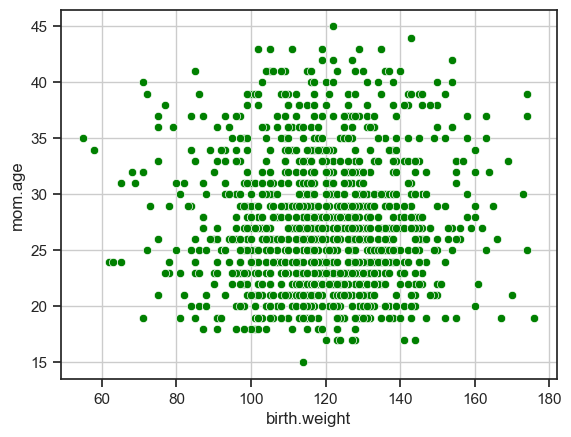

0.026982911002929478


In [6]:
seaborn.set(style="ticks")
seaborn.scatterplot(x=babies['birth.weight'], y=babies['mom.age'], color='green')
plt.grid()
plt.show()
print(babies['birth.weight'].corr(babies['mom.age']))

The plot does not demonstrate a linear relationship between the mother's age and the child's birth weight.
Based on the correlation between the two features, the mother's age does not appear to have a substantial influence on the child's birth weight. As a result, this functionality may also be removed.

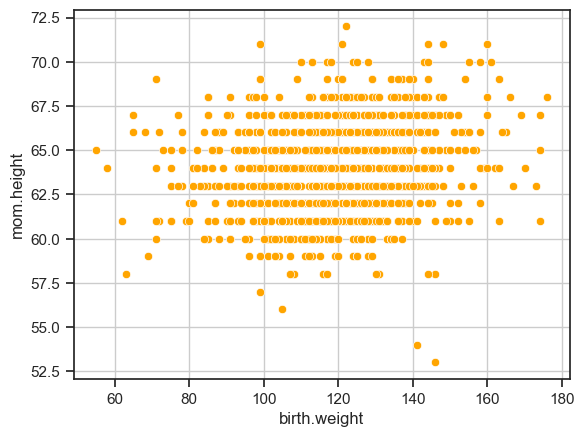

0.20370417718968017


In [7]:
seaborn.set(style="ticks")
seaborn.scatterplot(x=babies['birth.weight'],y=babies['mom.height'], color='orange')
plt.grid()
plt.show()
print(babies['birth.weight'].corr(babies['mom.height']))

The graph does not demonstrate a linear relationship between a mother's height and her child's birth weight. However, the correlation value indicates that the mother's height has a strong positive correlation with the child's weight. This feature must be preserved.

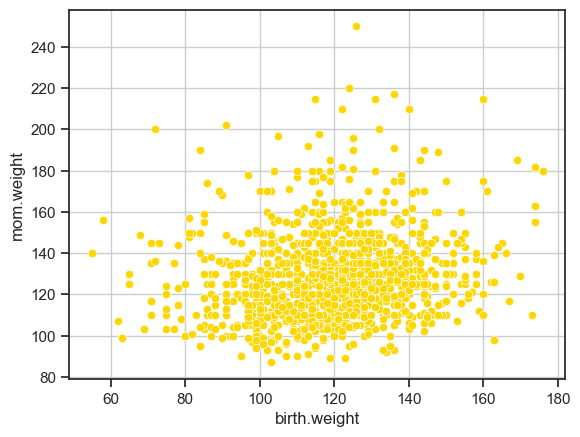

0.15592327018706936


In [8]:
seaborn.set(style="ticks")
seaborn.scatterplot(x=babies['birth.weight'], y=babies['mom.weight'], color='gold')
plt.grid()
plt.show()
print(babies['birth.weight'].corr(babies['mom.weight']))

The mother's weight does not appear to have a linear relationship with the weight of a kid at delivery. It does, however, indicate a strong positive relationship between the two features. As a result, it is recommended to maintain this as well.

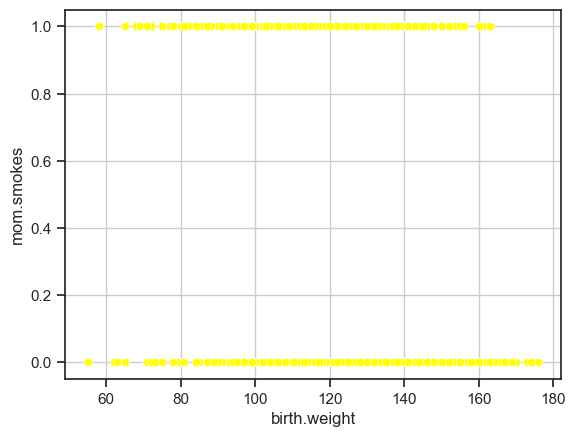

-0.24679951453057838


In [9]:
seaborn.set(style="ticks")
seaborn.scatterplot(x=babies['birth.weight'], y=babies['mom.smokes'], color='yellow')
plt.grid()
plt.show()
print(babies['birth.weight'].corr(babies['mom.smokes']))

According to the graph, there is no linear relationship between the size of a baby at delivery and the mother's smoking. Although the correlation value is substantial, we may exclude this characteristic from the analysis.

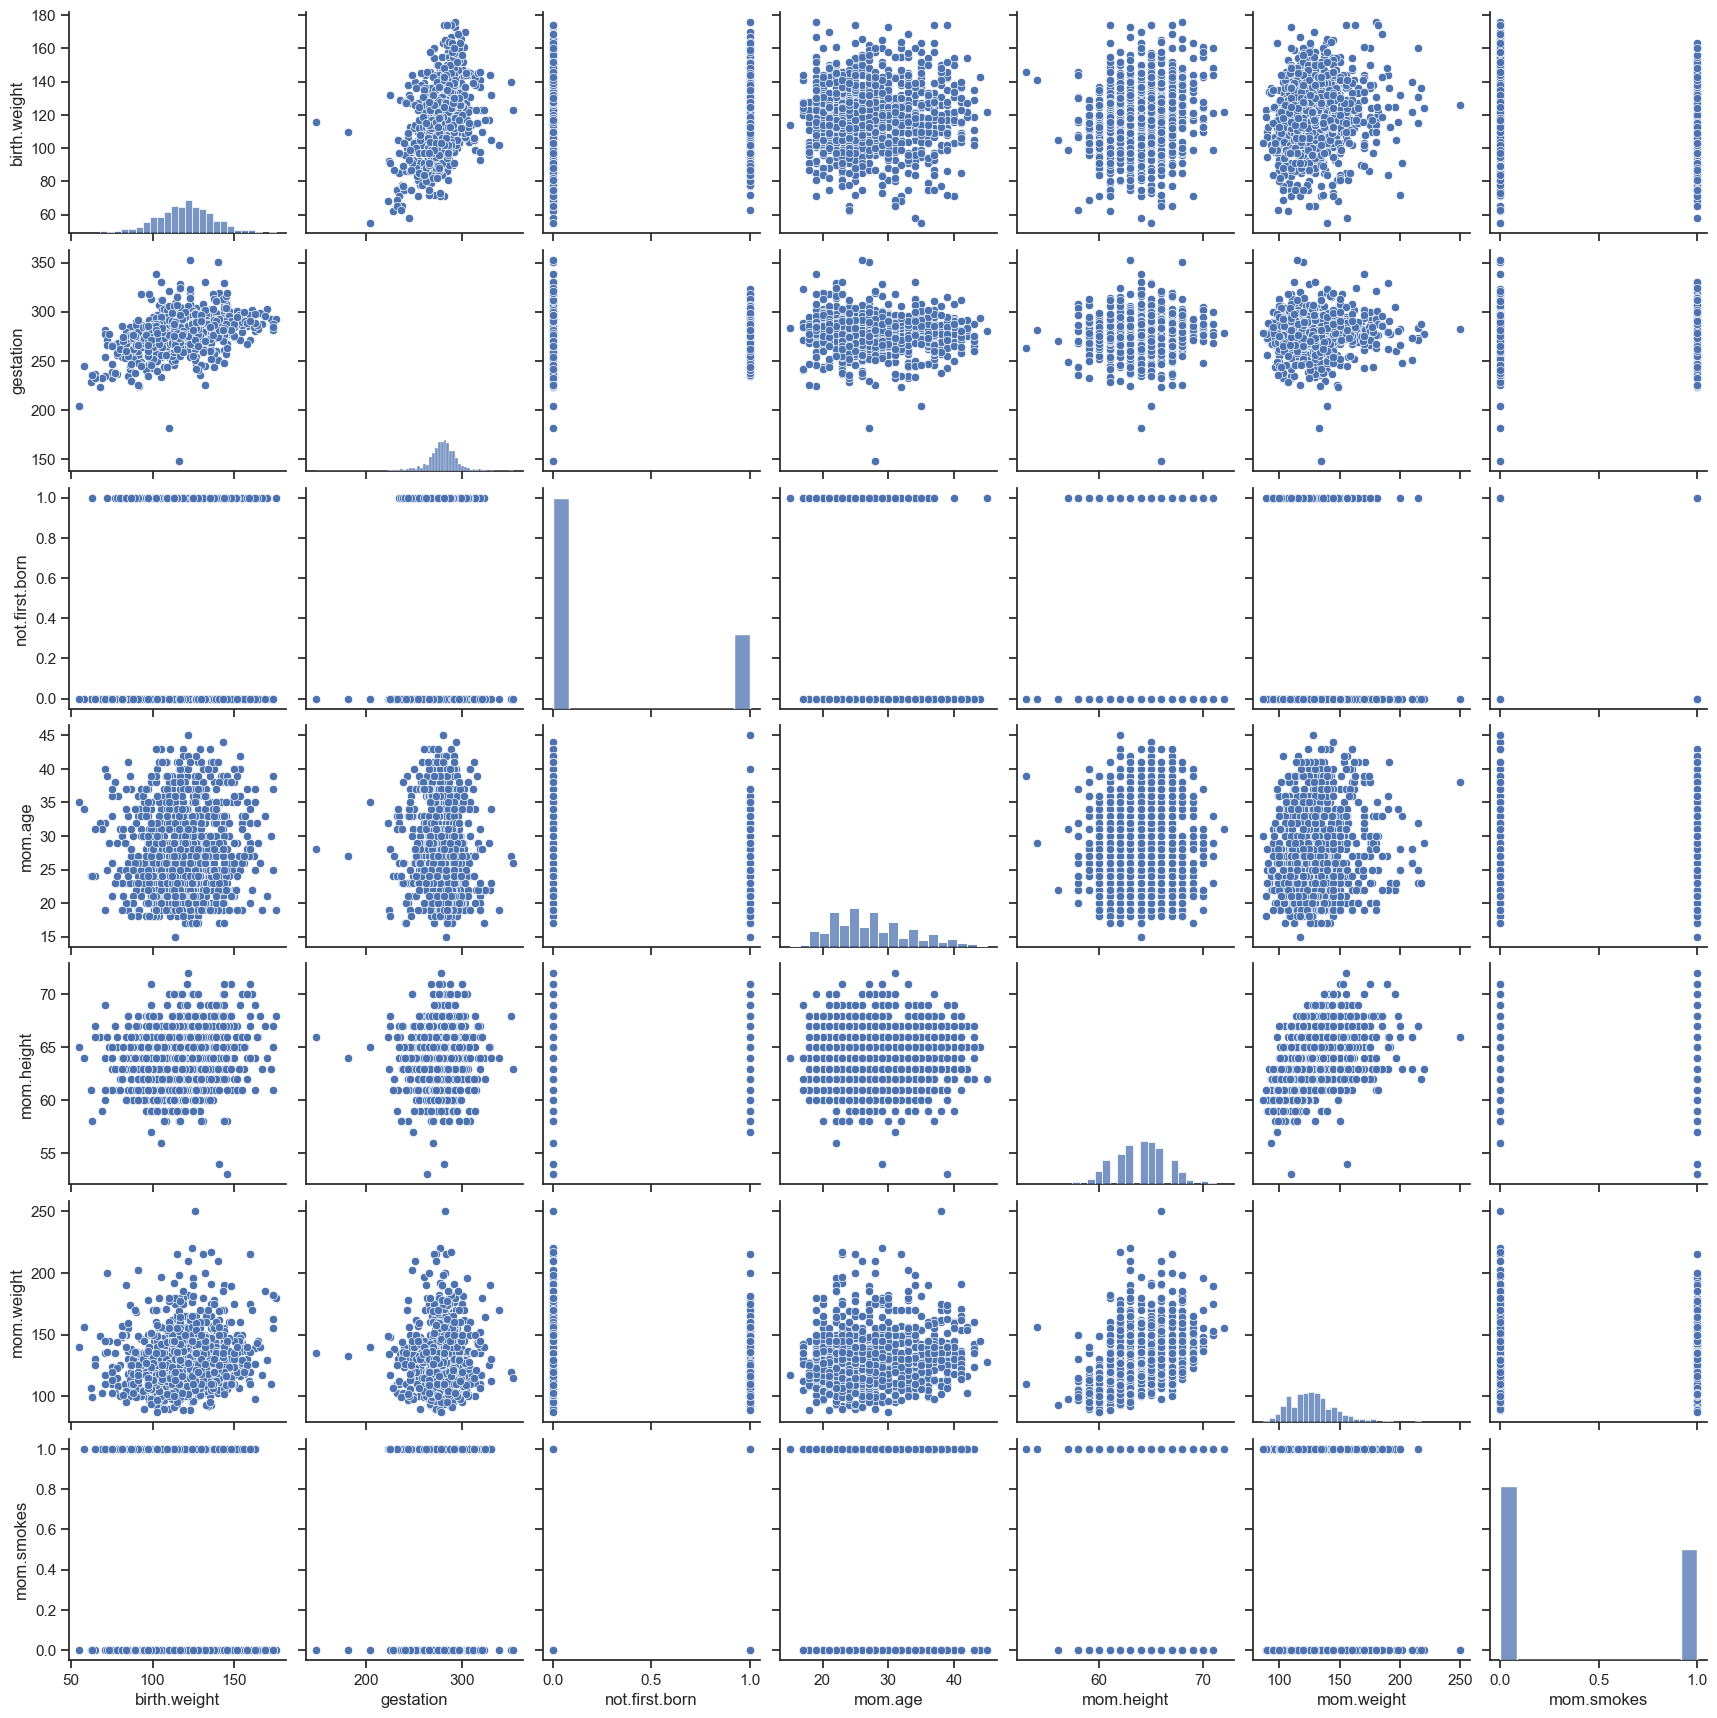

In [10]:
seaborn.pairplot(babies)

In [11]:
babies.corr(method='pearson')

,birth.weight,gestation,not.first.born,mom.age,mom.height,mom.weight,mom.smokes
birth.weight,1.000000,0.407543,-0.043908,0.026983,0.203704,0.155923,-0.246800
gestation,0.407543,1.000000,0.080916,-0.053425,0.070470,0.023655,-0.060267
not.first.born,-0.043908,0.080916,1.000000,-0.351041,0.043543,-0.096362,-0.009599
mom.age,0.026983,-0.053425,-0.351041,1.000000,-0.006453,0.147322,-0.067772
mom.height,0.203704,0.070470,0.043543,-0.006453,1.000000,0.435287,0.017507
mom.weight,0.155923,0.023655,-0.096362,0.147322,0.435287,1.000000,-0.060281
mom.smokes,-0.246800,-0.060267,-0.009599,-0.067772,0.017507,-0.060281,1.000000


In [69]:
babies_new = babies.drop(['mom.age', 'mom.smokes', 'not.first.born'], axis=1)

In [81]:
x = babies_new.drop('birth.weight', axis=1)
y = babies_new['birth.weight']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [82]:
MLR = LinearRegression()
MLR.fit(x_train,y_train)

LinearRegression()

In [83]:
print('Intercept: \n', MLR.intercept_)
print('Coefficients: \n', MLR.coef_)

Intercept: 
 -76.48357769053946
Coefficients: 
 [0.43458062 1.04130237 0.05895844]


In [84]:
y_prediction =  MLR.predict(x_test)

The accuracy of the model can be calculated using the r2_score function in sklearn.metrics.
It is calculated as 1 - (sum of residuals / sum of means)

In [110]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

score = r2_score(y_test, y_prediction)

print('r2 score: ', score)
print('mean_sqrd_error: ', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error: ', np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score:  0.22309014113767656
mean_sqrd_error:  297.5398896749426
root_mean_squared error:  17.249344615809104


The accuracy score is 22%, indicating that this model is not yet suitable for prediction.
This might be due to the dispersed nature of the features.
"gestation" is the sole characteristic that has a linear relationship with "birth.weight."